In [9]:
import urllib.parse

import pandas as pd

In [10]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

In [11]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [12]:
def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value

    params_string = urllib.parse.urlencode(params)

    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
 
    return df

In [13]:
stocks = get_stock_codes('kospi')

stocks

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,092220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
803,현대코퍼레이션,011760,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발",1977-12-01,12월,"정몽혁, 김원갑, 장안석(각자대표이사)",http://www.hyundaicorp.co.kr,서울특별시
804,현대코퍼레이션홀딩스,227840,음·식료품 및 담배 도매업,"브랜드사업, 육류유통",2015-10-23,12월,"정몽혁, 김원갑(각자대표이사)",http://www.hyundaicorpholdings.com,서울특별시
805,화신,010690,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도
806,휴켐스,069260,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시


매수 / 매도 결정 기본 예제 연습

In [14]:
stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)

DRB동일
004840


In [15]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from matplotlib import font_manager, rc
import platform

print(platform.system())

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    pass



Windows


In [16]:
end = date.today()
start = date.today() - timedelta(50) # datetime.datetime(2021,4,1) 

STOCK = web.DataReader(stock_code, start, end)
STOCK

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-20,6880,6920,6790,6890,32042,0.005839
2021-04-21,6830,7210,6830,7180,212413,0.042090
2021-04-22,7250,7280,7000,7100,93746,-0.011142
2021-04-23,7110,7150,7000,7050,46305,-0.007042
2021-04-26,7090,7450,7000,7350,312029,0.042553
2021-04-27,7350,7450,7250,7430,239909,0.010884
2021-04-28,7350,7480,7010,7120,171363,-0.041723
2021-04-29,7120,7160,6910,7110,51032,-0.001404
2021-04-30,7160,7160,6940,7040,40599,-0.009845


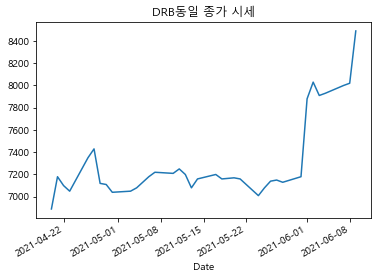

In [32]:
STOCK['Close'].plot()
# print(plt.style.available)
# plt.style.use(['fivethirtyeight'])
plt.title(stock_name+" 종가 시세")
plt.show()

In [18]:
STOCK.tail()
STOCK["MA_5"]=STOCK["Close"].rolling(window=5).mean() # min_periods=1
STOCK["MA_20"]=STOCK["Close"].rolling(window=20).mean()
STOCK["diff"]=STOCK["MA_5"]-STOCK["MA_20"]
STOCK.tail(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2021-06-03,8040,8070,7820,7910,211222,-0.014944,7626.0,7275.0,351.0
2021-06-04,7920,8120,7880,7930,168039,0.002528,7786.0,7312.5,473.5
2021-06-07,7930,8090,7750,8000,130706,0.008827,7950.0,7351.5,598.5
2021-06-08,8000,8080,7910,8020,62912,0.002500,7978.0,7392.0,586.0
2021-06-09,8040,8660,8040,8490,455679,0.058603,8070.0,7454.0,616.0


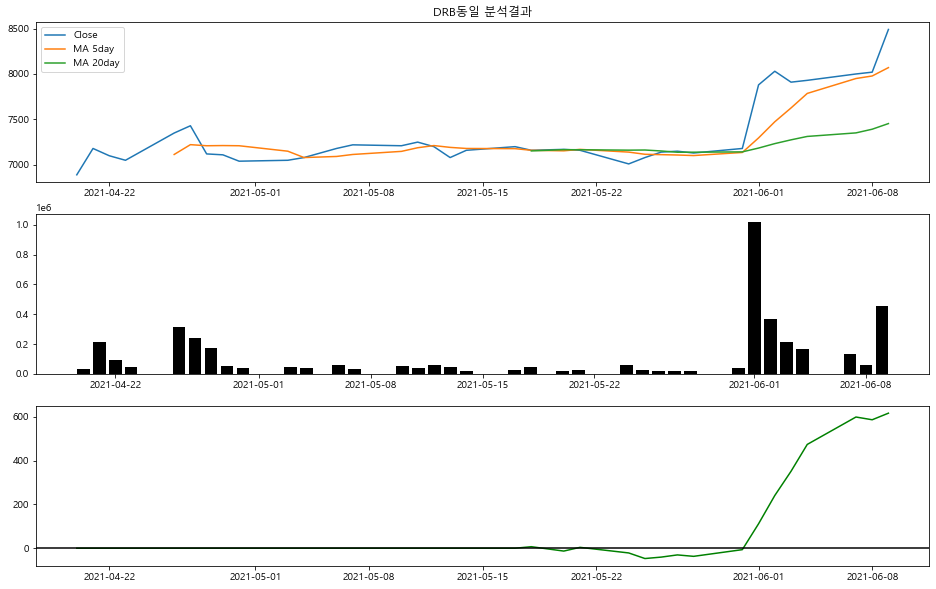

In [19]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(STOCK.index, STOCK['Close'], label = 'Close')
plt.plot(STOCK.index, STOCK['MA_5'], label='MA 5day')
plt.plot(STOCK.index, STOCK['MA_20'], label='MA 20day')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(STOCK.index, STOCK['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(STOCK.index, STOCK['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k') # https://financedata.github.io/posts/matplotlib_hline_and_vline.html